In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [9]:
def System(y,x):
    
    
    dydx = x + 2*y
    
    return dydx

In [10]:
x = np.linspace(0.,4.,100)
r0 = [0.,0.]

In [11]:
sol = odeint(System, r0, x)

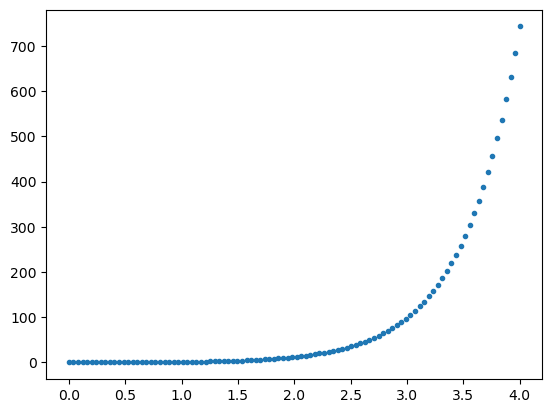

In [42]:
plt.scatter(x,sol[:,0],marker='.')

In [85]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    
    
    x[0] = r0[1]
    
    
    # El primer punto es la condicion inicial. Los siguientes 4 puntos se encuentran con Runge-Kutta 4
    
    for i in range (1, 4):
        
        r= x[0]
        k1 = f(r, t[i-1])
        k2 = f(r+0.5*h*k1, t[i-1]+0.5*h)
        k3 = f(r+0.5*h*k2, t[i-1]+0.5*h)
        k4 = f(r+h*k3, t[i-1]+h)
        
        x[i] = x[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)
       
    
    xc = x.copy()
    
    
    for i in range(5,len(t)):
        
        
        p1 = f(x[i-1], t[i-1])
        p2 = f(x[i-2], t[i-2])
        p3 = f(x[i-3], t[i-3])
        p4 = f(x[i-4], t[i-4])
        p5 = f(x[i-5], t[i-5])
        
        
        # Se predice el siguiente punto con Adams
        
        x[i] = x[i-1] + h*(1901*p1 - 2774*p2 + 2616*p3 - 1274*p4 + 251*p5)/720
        
        
        # Se corrige la prediccion con Moulton 
        
        xc[i] = x[i]
        
        
        p0 = f(x[i], t[i])
        
        xc[i] = xc[i-1] + h*(475*p0 + 1427*p1 - 798*p2 + 482*p3 - 173*p4 + 27*p5)/1440
    
    
    return xc

In [86]:
sol2 = IntegratorAdams(System,r0,x)

0.04040404040404041


In [87]:
def exact(x):
    return -0.5*x - (1-np.exp(2*x))/4

ex = exact(x)


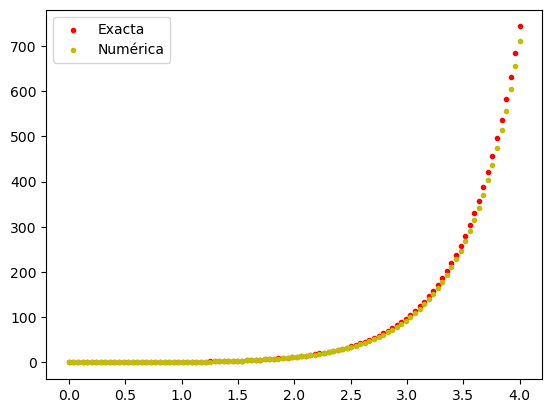

In [88]:
plt.scatter(x,exact(x),marker='.',color='r', label='Exacta')
plt.scatter(x,sol2,marker='.',color='y', label='Numérica')
#plt.scatter(x,sol[:,1],marker='.')
plt.legend()

C:\Users\ja.gonzalezv1\AppData\Local\Temp\ipykernel_11008\747349829.py:1: RuntimeWarning: divide by zero encountered in log
  diff = np.log(abs(ex - sol2))


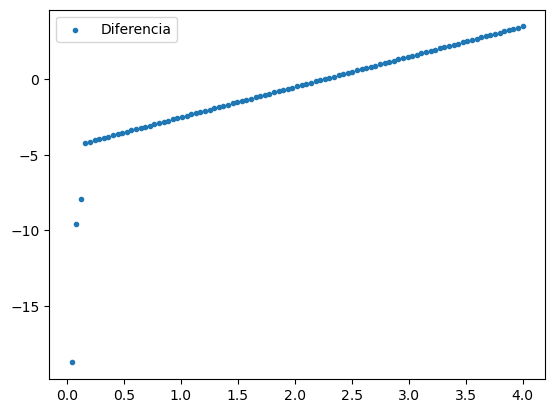

In [89]:
diff = np.log(abs(ex - sol2))


plt.scatter(x,diff,marker='.', label='Diferencia')

plt.legend()